In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE # Used to  visualise clustering plot
from yellowbrick.cluster import SilhouetteVisualizer

original_data=pd.read_csv('credit-card-data.csv')
original_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
original_data.shape

(8950, 17)

In [3]:
# Percentage of Missing values in each column
original_data.isnull().mean()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

[Text(0.5, 1.0, 'Distribution of CREDIT_LIMIT before imputation')]

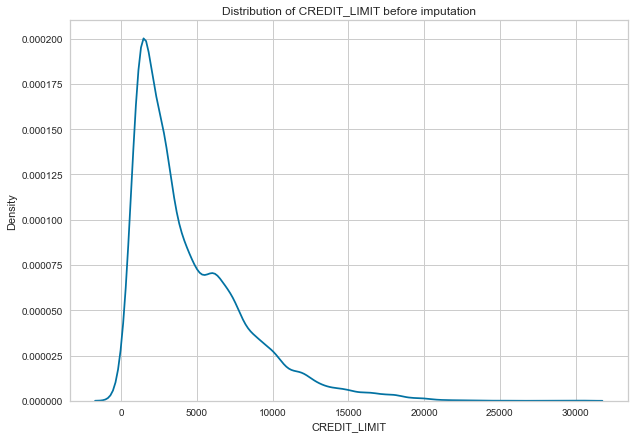

In [4]:
plt.figure(figsize=(10,7))
ax=sns.kdeplot(original_data['CREDIT_LIMIT'])
ax.set(title='Distribution of CREDIT_LIMIT before imputation')

[Text(0.5, 1.0, 'Distribution of MINIMUM_PAYMENTS before imputation')]

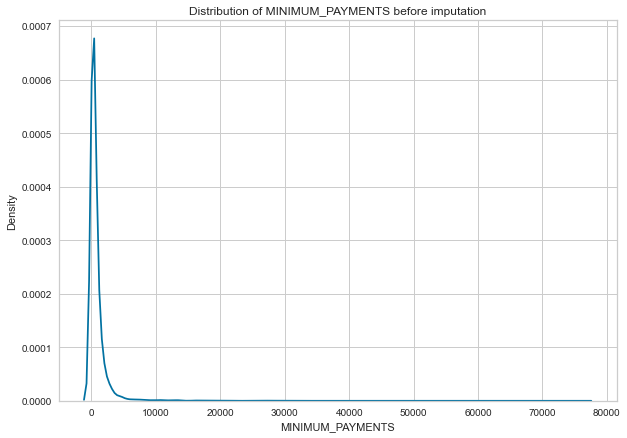

In [5]:
plt.figure(figsize=(10,7))
ax=sns.kdeplot(original_data['MINIMUM_PAYMENTS'])
ax.set(title='Distribution of MINIMUM_PAYMENTS before imputation')

In [6]:
original_data.dropna(axis=0,how='any',subset=['CREDIT_LIMIT'],inplace=True)
original_data.reset_index(drop=True,inplace=True)

In [7]:
original_data['MINIMUM_PAYMENTS'].fillna(original_data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [8]:
original_data.isnull().mean()

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

[Text(0.5, 1.0, 'Distribution of CREDIT_LIMIT after imputation')]

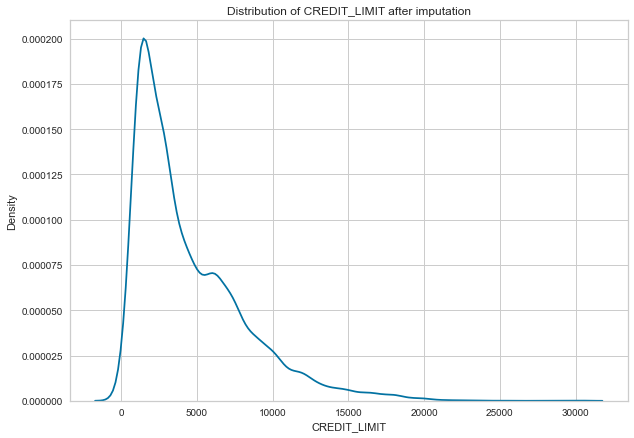

In [9]:
plt.figure(figsize=(10,7))
ax=sns.kdeplot(original_data['CREDIT_LIMIT'])
ax.set(title='Distribution of CREDIT_LIMIT after imputation')

[Text(0.5, 1.0, 'Distribution of MINIMUM_PAYMENTS after imputation')]

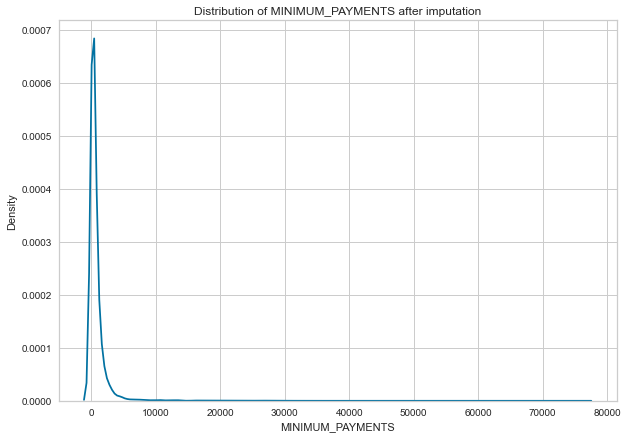

In [10]:
plt.figure(figsize=(10,7))
ax=sns.kdeplot(original_data['MINIMUM_PAYMENTS'])
ax.set(title='Distribution of MINIMUM_PAYMENTS after imputation')

In [11]:
original_data['Monthly_avg_Purchase']=original_data['PURCHASES']/original_data['TENURE']
original_data['Monthly_avg_Purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_Purchase, dtype: float64

In [12]:
original_data['Monthly_avg_cash']=original_data['CASH_ADVANCE']/original_data['TENURE']
original_data['Monthly_avg_cash'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_avg_cash, dtype: float64

In [13]:
original_data.loc[(original_data.ONEOFF_PURCHASES==0) & (original_data.INSTALLMENTS_PURCHASES==0),'Type_of_Purchase']='No_purchase'
original_data.loc[(original_data.ONEOFF_PURCHASES>0) & (original_data.INSTALLMENTS_PURCHASES==0),'Type_of_Purchase']='One_of_purchase'
original_data.loc[(original_data.ONEOFF_PURCHASES==0) & (original_data.INSTALLMENTS_PURCHASES>0),'Type_of_Purchase']='Installment_purchase'
original_data.loc[(original_data.ONEOFF_PURCHASES>0) & (original_data.INSTALLMENTS_PURCHASES>0),'Type_of_Purchase']='Both_purchase'

In [14]:
original_data['Limit_usage']=original_data['BALANCE']/original_data['CREDIT_LIMIT']
original_data['Payment_ratio']=original_data['PAYMENTS']/original_data['MINIMUM_PAYMENTS']

In [15]:
original_data.drop(columns=['BALANCE','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','PURCHASES','TENURE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS','MINIMUM_PAYMENTS','CREDIT_LIMIT'],axis=1,inplace=True)

In [16]:
def diagnostic_plots(df, variable):
    

    plt.figure(figsize=(16, 6))

    # density
    plt.subplot(1, 3, 1)
    sns.kdeplot(df[variable])
    plt.title('Density')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable],color='b')
    plt.title('Boxplot')

    plt.show()

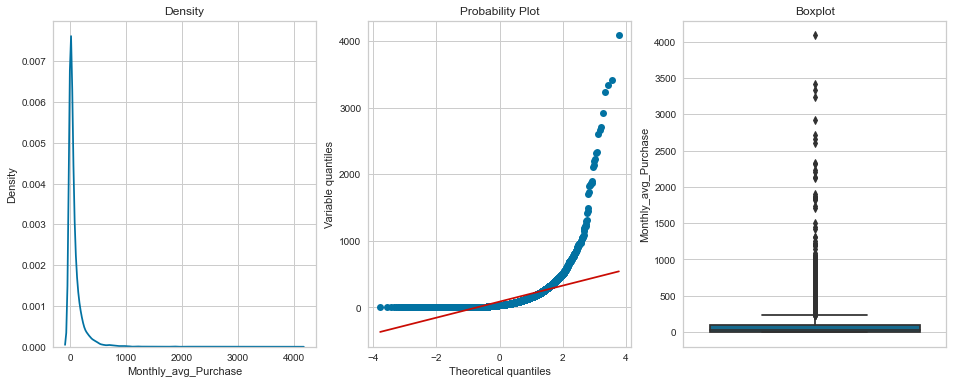

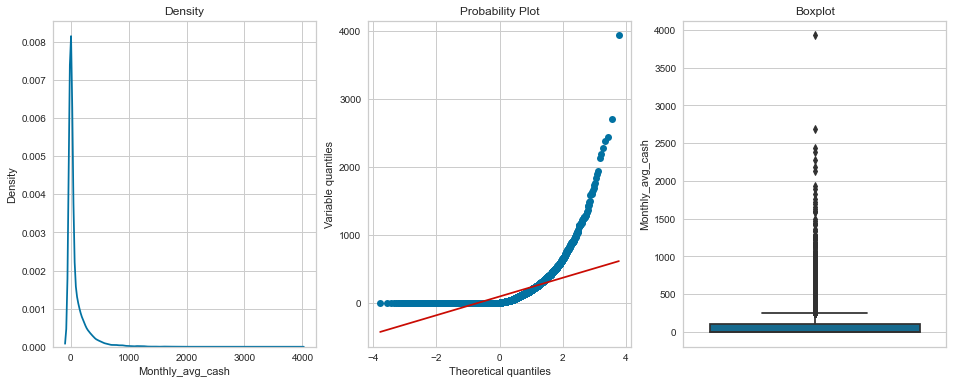

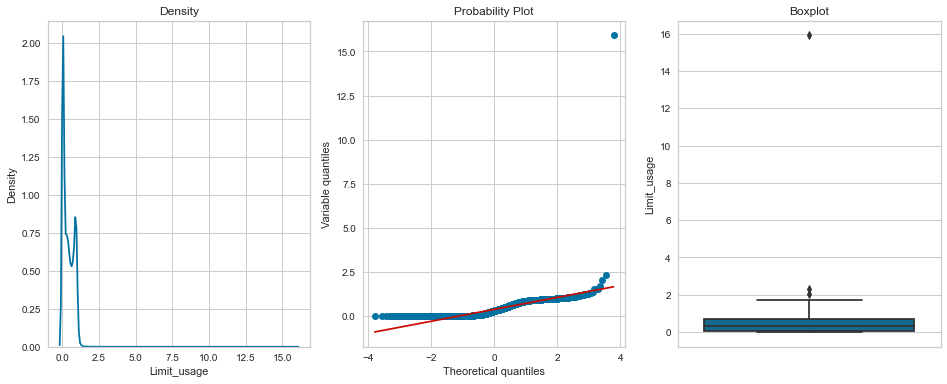

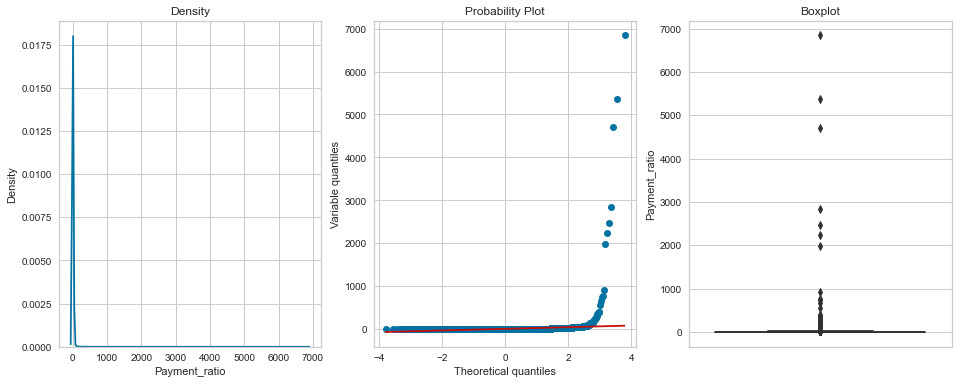

In [17]:
for col in original_data.columns[original_data.columns!='Type_of_Purchase']:
  diagnostic_plots(original_data,col)

In [18]:
def remove_outlier(df,variable):
  iqr=df[variable].quantile(0.75) - df[variable].quantile(0.25)
  upper=df[variable].quantile(0.75) + (iqr * 1.5)
  lower=df[variable].quantile(0.25) - (iqr * 1.5)
  return upper, lower

In [19]:
for col in original_data.columns[original_data.columns!='Type_of_Purchase']:
  upper_bound, lower_bound = remove_outlier(original_data, col)
  original_data[col]= np.where(original_data[col] > upper_bound, upper_bound,
                       np.where(original_data[col] < lower_bound, lower_bound,original_data[col]))

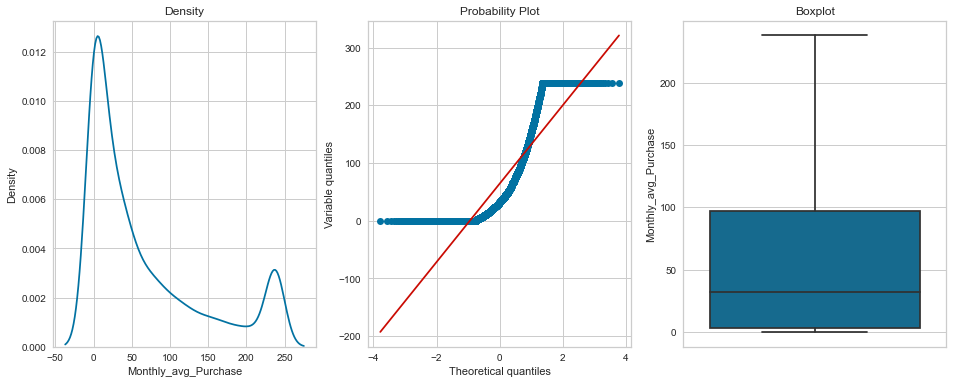

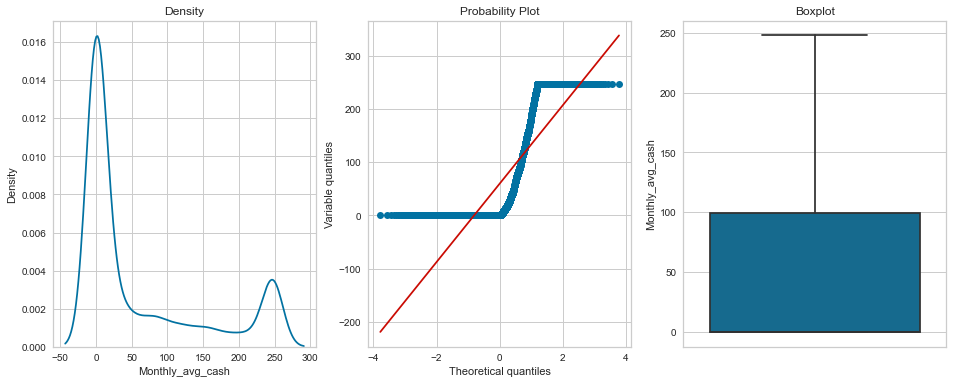

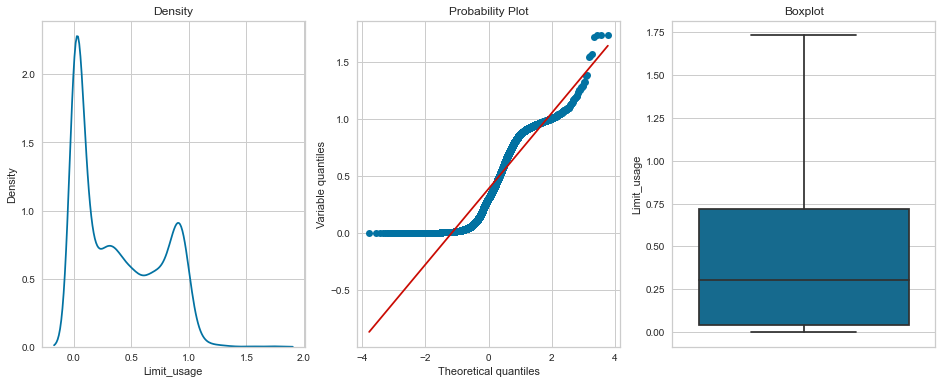

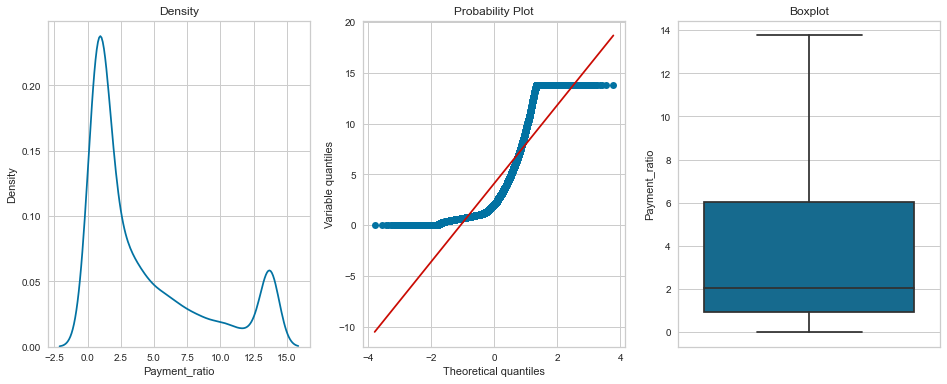

In [20]:
for col in original_data.columns[original_data.columns!='Type_of_Purchase']:
  diagnostic_plots(original_data,col)

In [21]:
from feature_engine.encoding import OneHotEncoder

ohe=OneHotEncoder(variables=['Type_of_Purchase'], drop_last=False)

original_data=ohe.fit_transform(original_data)

In [22]:
original_data

,Monthly_avg_Purchase,Monthly_avg_cash,Limit_usage,Payment_ratio,Type_of_Purchase_Installment_purchase,Type_of_Purchase_No_purchase,Type_of_Purchase_One_of_purchase,Type_of_Purchase_Both_purchase
0,7.950000,0.000000,0.040901,1.446508,1,0,0,0
1,0.000000,247.769326,0.457495,3.826241,0,1,0,0
2,64.430833,0.000000,0.332687,0.991682,0,0,1,0
3,124.916667,17.149001,0.222223,0.000000,0,0,1,0
4,1.333333,0.000000,0.681429,2.771075,0,0,1,0
...,...,...,...,...,...,...,...,...
8944,48.520000,0.000000,0.028494,6.660231,1,0,0,0
8945,50.000000,0.000000,0.019183,0.882891,1,0,0,0
8946,24.066667,0.000000,0.023399,0.986076,1,0,0,0
8947,0.000000,6.093130,0.026915,0.942505,0,1,0,0


In [23]:
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([('sc', StandardScaler(), ['Monthly_avg_Purchase','Monthly_avg_cash','Payment_ratio', 'Limit_usage'])],remainder='passthrough')

scaled_data=ct.fit_transform(original_data)

In [24]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7
0,-0.735535,-0.671928,-0.610366,-0.980278,1.0,0.0,0.0,0.0
1,-0.839440,2.112925,-0.061196,0.198844,0.0,1.0,0.0,0.0
2,0.002661,-0.671928,-0.715326,-0.154413,0.0,0.0,1.0,0.0
3,0.793203,-0.479178,-0.944176,-0.467068,0.0,0.0,1.0,0.0
4,-0.822014,-0.671928,-0.304696,0.832661,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
8944,-0.205291,-0.671928,0.592802,-1.015395,1.0,0.0,0.0,0.0
8945,-0.185947,-0.671928,-0.740432,-1.041747,1.0,0.0,0.0,0.0
8946,-0.524892,-0.671928,-0.716620,-1.029816,1.0,0.0,0.0,0.0
8947,-0.839440,-0.603443,-0.726675,-1.019863,0.0,1.0,0.0,0.0


In [25]:
kmeans_5=KMeans(n_clusters=5,init='k-means++',n_init=100,random_state=34)
y_kmeans_5=kmeans_5.fit_predict(scaled_data)

In [26]:
# Used for visualising Higher dimensional plots

m=TSNE(random_state=34)
pc=m.fit_transform(scaled_data)

In [27]:
pc=pd.DataFrame(pc,columns=['dim1','dim2'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


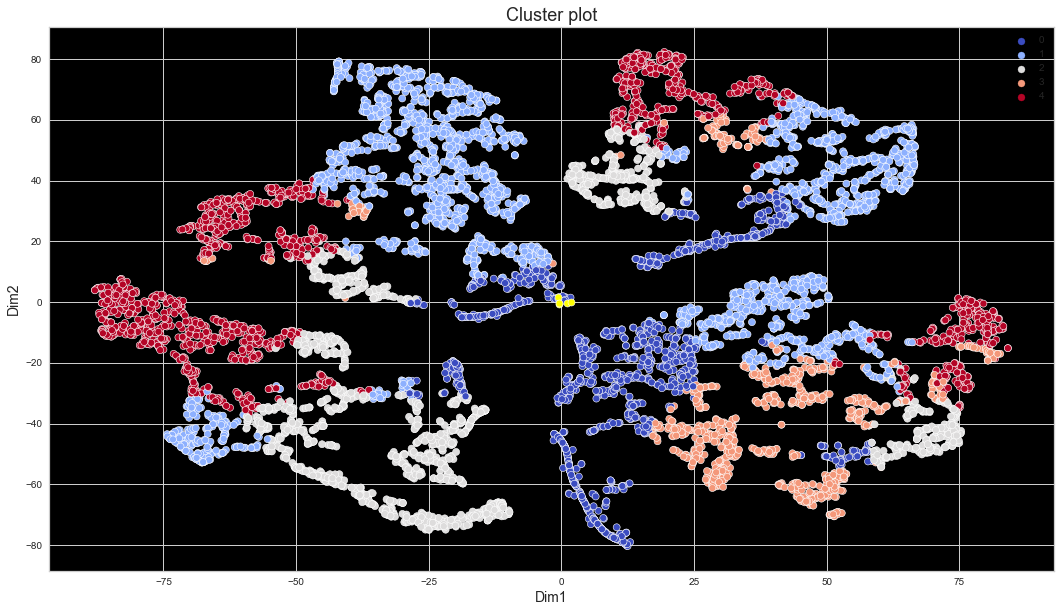

In [28]:
fig,ax=plt.subplots(figsize=(18,10))
ax1=sns.scatterplot(x='dim1',y='dim2',data=pc,hue=y_kmeans_5,palette='coolwarm')
ax1.set_facecolor('black')
ax1.set_xlabel('Dim1',fontsize=14)
ax1.set_ylabel('Dim2',fontsize=14)
ax1.set_title('Cluster plot',fontsize=18,fontweight=2)
ax2=sns.scatterplot(kmeans_5.cluster_centers_[:,0],kmeans_5.cluster_centers_[:,1],color='yellow');

In [30]:
original_data.head()

,Monthly_avg_Purchase,Monthly_avg_cash,Limit_usage,Payment_ratio,Type_of_Purchase_Installment_purchase,Type_of_Purchase_No_purchase,Type_of_Purchase_One_of_purchase,Type_of_Purchase_Both_purchase
0,7.950000,0.000000,0.040901,1.446508,1,0,0,0
1,0.000000,247.769326,0.457495,3.826241,0,1,0,0
2,64.430833,0.000000,0.332687,0.991682,0,0,1,0
3,124.916667,17.149001,0.222223,0.000000,0,0,1,0
4,1.333333,0.000000,0.681429,2.771075,0,0,1,0


In [32]:
original_data['k-5']=y_kmeans_5
original_data['k-5']=original_data['k-5'].astype('category')
original_data.head()

,Monthly_avg_Purchase,Monthly_avg_cash,Limit_usage,Payment_ratio,Type_of_Purchase_Installment_purchase,Type_of_Purchase_No_purchase,Type_of_Purchase_One_of_purchase,Type_of_Purchase_Both_purchase,k-5
0,7.950000,0.000000,0.040901,1.446508,1,0,0,0,1
1,0.000000,247.769326,0.457495,3.826241,0,1,0,0,2
2,64.430833,0.000000,0.332687,0.991682,0,0,1,0,1
3,124.916667,17.149001,0.222223,0.000000,0,0,1,0,1
4,1.333333,0.000000,0.681429,2.771075,0,0,1,0,4


In [33]:
cluster_5_table=original_data.pivot_table(index=['k-5'],values=['Monthly_avg_Purchase', 'Monthly_avg_cash',
       'Limit_usage', 'Payment_ratio'],aggfunc='mean')   

In [34]:
cluster_5_table['Percent of customers']=round(original_data.groupby('k-5').size()/len(original_data['k-5']),2)
cluster_5_table

,Limit_usage,Monthly_avg_Purchase,Monthly_avg_cash,Payment_ratio,Percent of customers
k-5,,,,,
0,0.094417,141.593427,21.935705,11.964182,0.17
1,0.099467,33.556414,8.363832,2.920256,0.33
2,0.563634,21.419846,214.370128,3.248519,0.19
3,0.513203,196.402618,52.585245,2.622583,0.10
4,0.846644,25.344261,32.554826,1.196828,0.21


In [35]:
cluster_5_table=original_data.pivot_table(index=['k-5'],values=['Monthly_avg_Purchase', 'Monthly_avg_cash',
       'Limit_usage', 'Payment_ratio'],aggfunc='mean')   

In [36]:
cluster_5_table['Percent of customers']=round(original_data.groupby('k-5').size()/len(original_data['k-5']),2)
cluster_5_table

,Limit_usage,Monthly_avg_Purchase,Monthly_avg_cash,Payment_ratio,Percent of customers
k-5,,,,,
0,0.094417,141.593427,21.935705,11.964182,0.17
1,0.099467,33.556414,8.363832,2.920256,0.33
2,0.563634,21.419846,214.370128,3.248519,0.19
3,0.513203,196.402618,52.585245,2.622583,0.10
4,0.846644,25.344261,32.554826,1.196828,0.21


In [41]:
def plot_data(variable):
  fig,(ax1)=plt.subplots(1,1,figsize=(10,10))
  ax1.set_facecolor('black')
  ax1.bar(cluster_5_table.index,height=variable,color='cyan',data=cluster_5_table,width=0.3)
  ax1.set_xticks(ticks=np.arange(0,5,1))
  ax1.set_xticklabels(labels=['CL-'+str(i) for i in range(1,6)])
  ax1.set_xlabel('Number of clusters')
  ax1.set_ylabel(variable,fontsize=15)

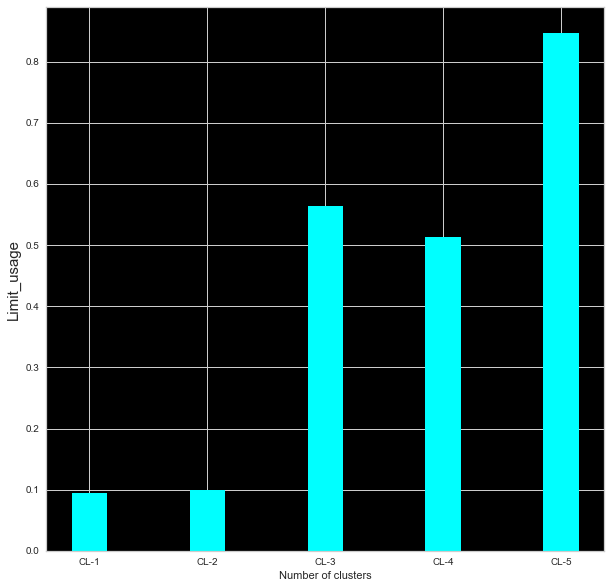

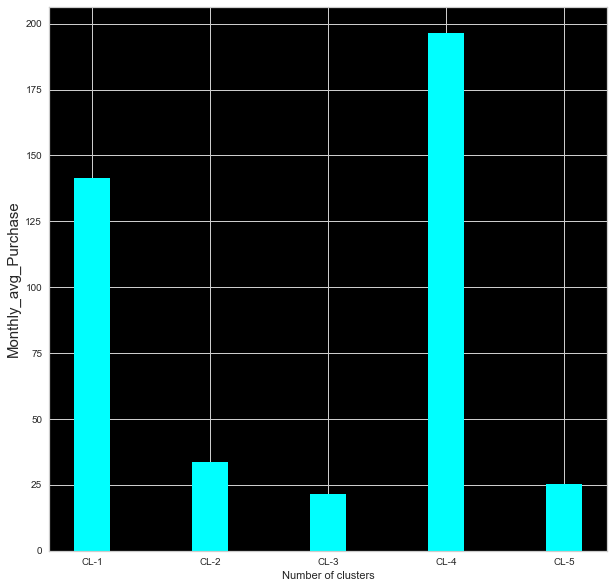

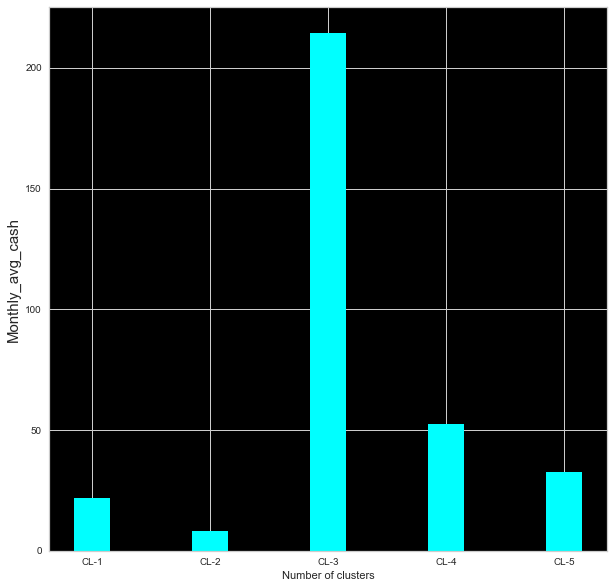

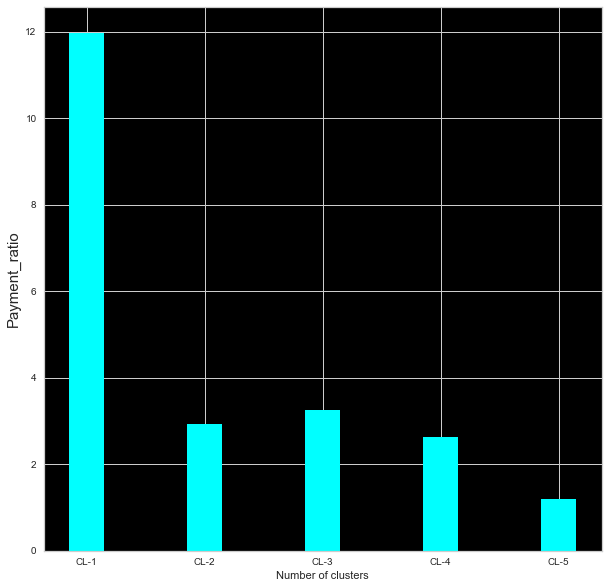

In [42]:
for i in cluster_5_table.columns[:-1]:
  plot_data(i)

In [43]:
original_data.drop(columns=['k-5'],axis=1,inplace=True)

In [44]:
original_data['Group_id']=y_kmeans_5
original_data

,Monthly_avg_Purchase,Monthly_avg_cash,Limit_usage,Payment_ratio,Type_of_Purchase_Installment_purchase,Type_of_Purchase_No_purchase,Type_of_Purchase_One_of_purchase,Type_of_Purchase_Both_purchase,Group_id
0,7.950000,0.000000,0.040901,1.446508,1,0,0,0,1
1,0.000000,247.769326,0.457495,3.826241,0,1,0,0,2
2,64.430833,0.000000,0.332687,0.991682,0,0,1,0,1
3,124.916667,17.149001,0.222223,0.000000,0,0,1,0,1
4,1.333333,0.000000,0.681429,2.771075,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...
8944,48.520000,0.000000,0.028494,6.660231,1,0,0,0,1
8945,50.000000,0.000000,0.019183,0.882891,1,0,0,0,1
8946,24.066667,0.000000,0.023399,0.986076,1,0,0,0,1
8947,0.000000,6.093130,0.026915,0.942505,0,1,0,0,1


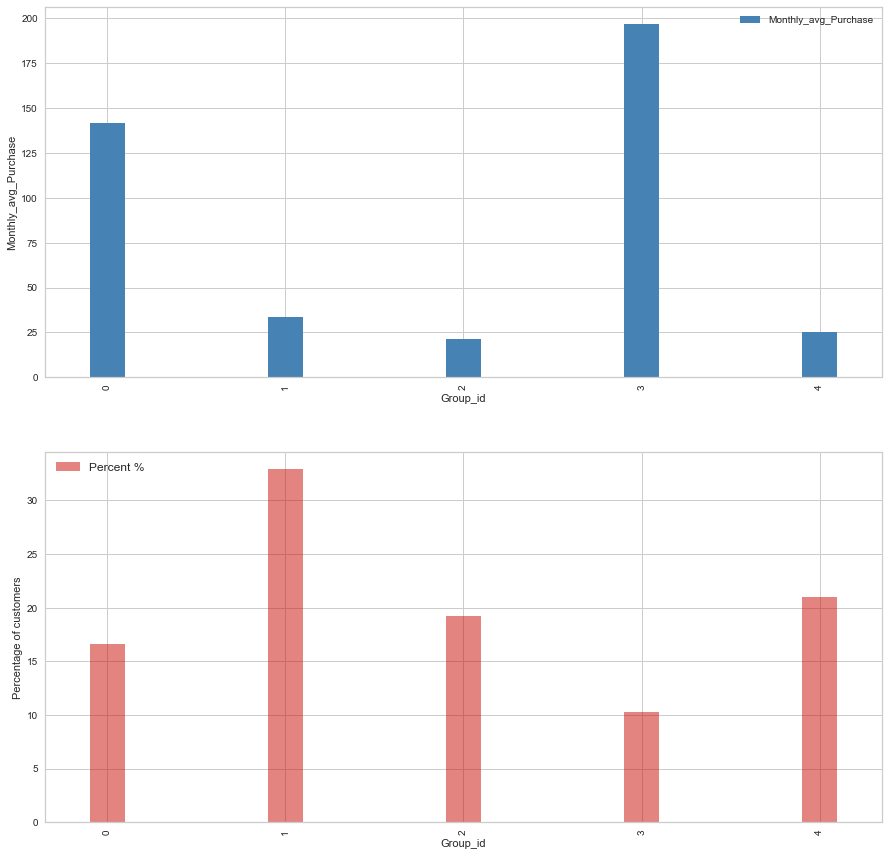

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
original_data.groupby(['Group_id'])['Monthly_avg_Purchase'].mean().plot(kind='bar',legend=True,color='steelblue',width=0.2)
plt.ylabel('Monthly_avg_Purchase')
plt.subplot(2,1,2)
((original_data.groupby(['Group_id']).size())/len(original_data)*100).plot(kind='bar',color='r',alpha=0.5,legend=True,width=0.2)
plt.ylabel('Percentage of customers')
plt.legend(labels=['Percent %'],loc='upper left',fontsize=12)

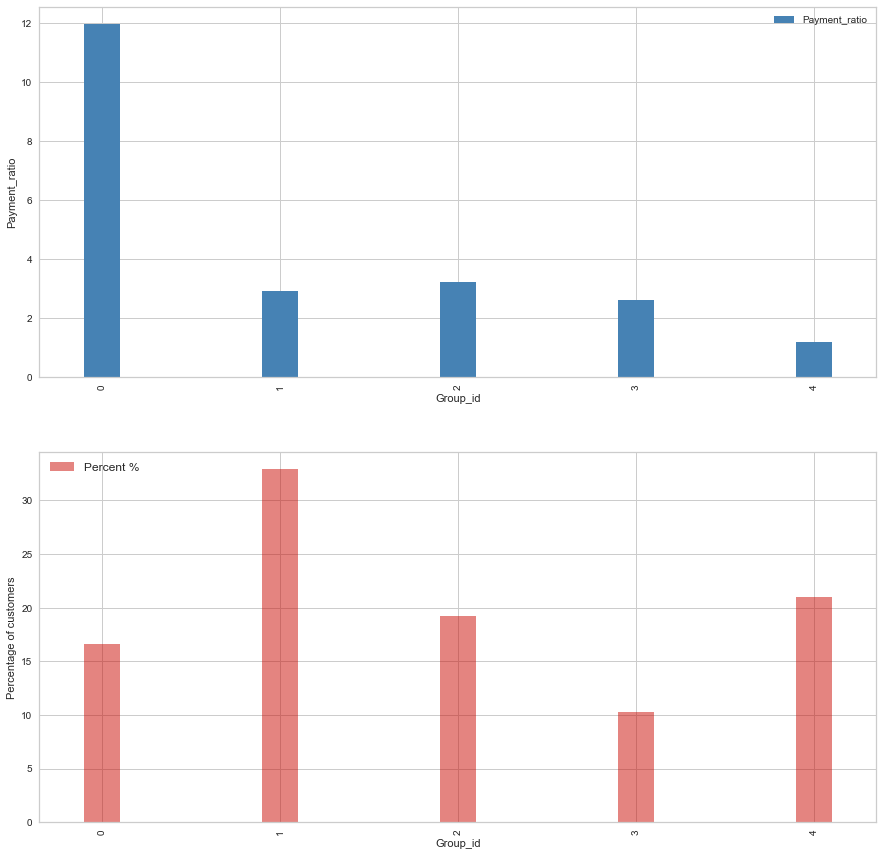

In [46]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
original_data.groupby(['Group_id'])['Payment_ratio'].mean().plot(kind='bar',legend=True,color='steelblue',width=0.2)
plt.ylabel('Payment_ratio')
plt.subplot(2,1,2)
((original_data.groupby(['Group_id']).size())/len(original_data)*100).plot(kind='bar',color='r',alpha=0.5,legend=True,width=0.2)
plt.ylabel('Percentage of customers')
plt.legend(labels=['Percent %'],loc='upper left',fontsize=12)

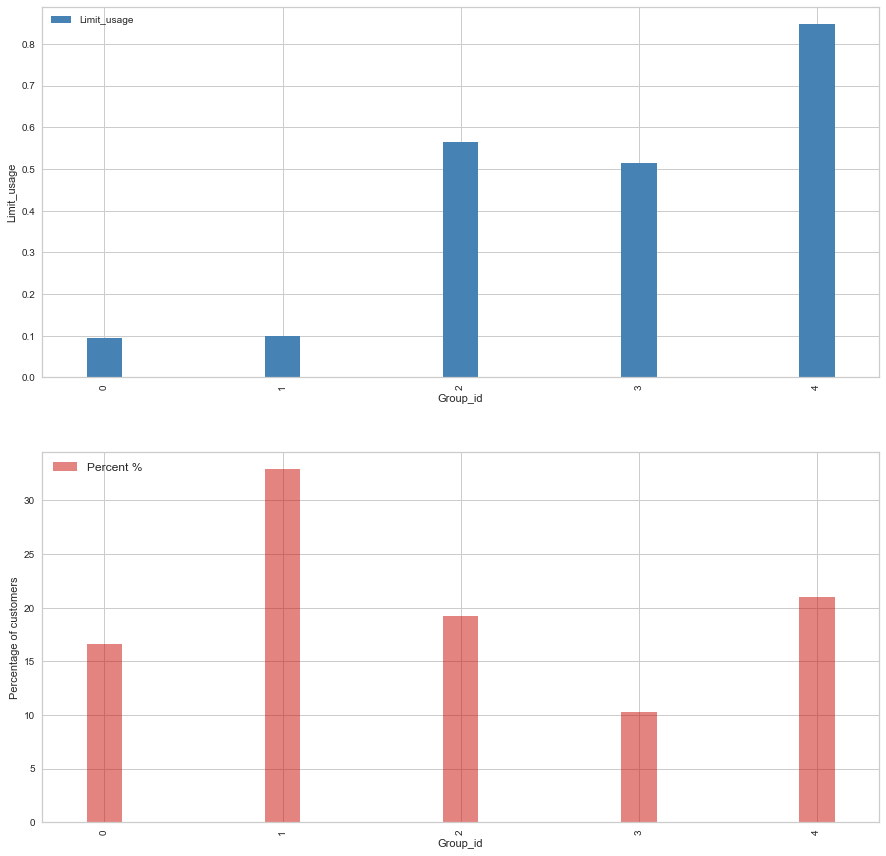

In [47]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
original_data.groupby(['Group_id'])['Limit_usage'].mean().plot(kind='bar',legend=True,color='steelblue',width=0.2)
plt.ylabel('Limit_usage')
plt.subplot(2,1,2)
((original_data.groupby(['Group_id']).size())/len(original_data)*100).plot(kind='bar',color='r',alpha=0.5,legend=True,width=0.2)
plt.ylabel('Percentage of customers')
plt.legend(labels=['Percent %'],loc='upper left',fontsize=12)

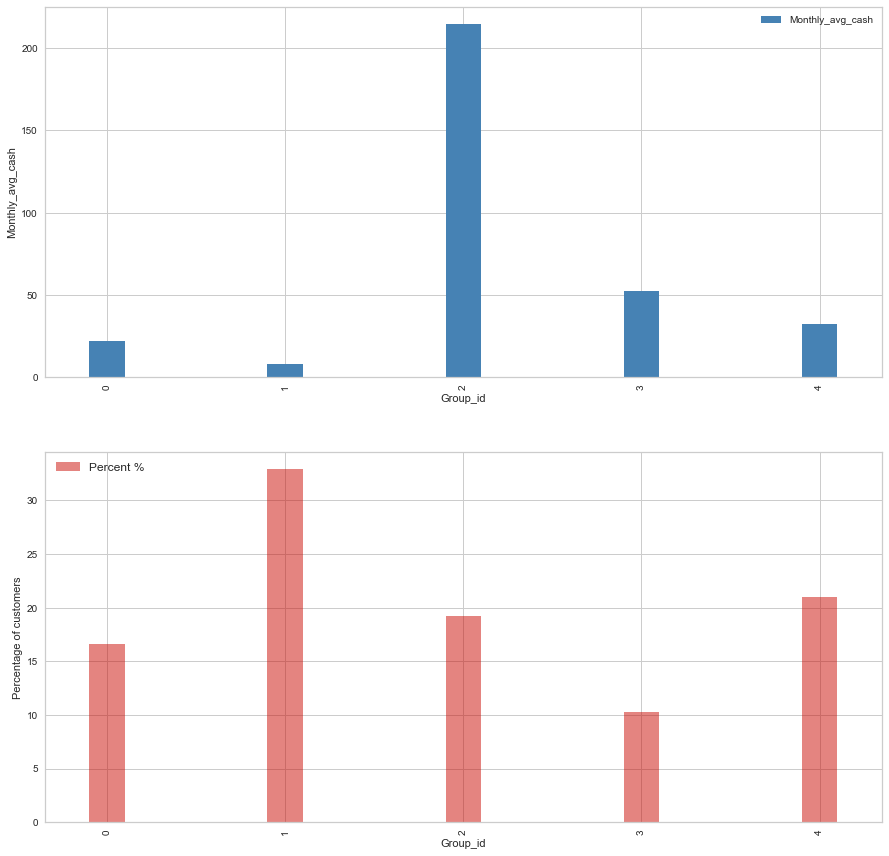

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
original_data.groupby(['Group_id'])['Monthly_avg_cash'].mean().plot(kind='bar',legend=True,color='steelblue',width=0.2)
plt.ylabel('Monthly_avg_cash')
plt.subplot(2,1,2)
((original_data.groupby(['Group_id']).size())/len(original_data)*100).plot(kind='bar',color='r',alpha=0.5,legend=True,width=0.2)
plt.ylabel('Percentage of customers')
plt.legend(labels=['Percent %'],loc='upper left',fontsize=12)

## Model Deployment

In [2]:
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import Winsorizer
from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.selection import DropFeatures
from Preprocessor import Droprow
from createcategory import CreateCategory
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from feature_engine.encoding import OneHotEncoder

from sklearn.compose import ColumnTransformer





preprocess_pipe=Pipeline([('dr',Droprow(variables=['CREDIT_LIMIT'])),('sm',MeanMedianImputer(imputation_method='median',variables=['MINIMUM_PAYMENTS'])),
                        ('kp_1',CombineWithReferenceFeature(variables_to_combine=['PURCHASES'],reference_variables=['TENURE'],operations=['div'],new_variables_names=['Monthly_avg_purchase'])),
                        ('kp_2',CombineWithReferenceFeature(variables_to_combine=['CASH_ADVANCE'],reference_variables=['TENURE'],operations=['div'],new_variables_names=['Monthly_avg_cash'])),
                        ('kp_3',CombineWithReferenceFeature(variables_to_combine=['PAYMENTS'],reference_variables=['MINIMUM_PAYMENTS'],operations=['div'],new_variables_names=['Payment ratio'])),
                        ('kp_4',CombineWithReferenceFeature(variables_to_combine=['BALANCE'],reference_variables=['CREDIT_LIMIT'],operations=['div'],new_variables_names=['Limit_usage'])),
                          ('cat',CreateCategory()),('oa',Winsorizer(capping_method='iqr',fold=1.5)),('ohe',OneHotEncoder(variables=['Type_of_Purchase'], drop_last=False)),
                        ('dc',DropFeatures(features_to_drop=['BALANCE','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
                                                             'CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','PURCHASES','TENURE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                                                             'PAYMENTS','MINIMUM_PAYMENTS','CREDIT_LIMIT']))
                         ,('ct',ColumnTransformer([
        ('sc', StandardScaler(), ['Monthly_avg_purchase','Monthly_avg_cash','Payment ratio', 'Limit_usage'])
    ], remainder='passthrough'))])

n>>>>>>init() called.



In [3]:
X=preprocess_pipe.fit_transform(original_data)

In [4]:
km=KMeans(n_clusters=5,init='k-means++',n_init=100,random_state=34)
km.fit(X)

KMeans(n_clusters=5, n_init=100, random_state=34)

In [5]:
km.predict([X[1]])

array([0])

In [6]:
from joblib import load,dump

dump(km,'cluster_model.joblib')

['cluster_model.joblib']